### Importing Libraries

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [259]:
#loading the train dataset
df=pd.read_excel(r'C:\Users\Admin\Desktop\Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [260]:
#loading the test dataset
df_test=pd.read_excel(r'C:\Users\Admin\Desktop\Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [261]:
#checking train datsset shape
df.shape

(10683, 11)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [263]:
#finding the null values from the dataset
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [264]:
# route and total stops has NAN so filling the missing values with the help of mode
df['Route'].fillna(df['Route'].mode()[0], inplace=True)
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)

In [265]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [266]:
#Separating the day month and year and will remove date_of_journey columns as it no longer required
df[['Day','Month','Year']]=df['Date_of_Journey'].str.split('/', expand=True)
df.drop(columns='Date_of_Journey',axis=1,inplace=True)

In [267]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [268]:
#checking for duplicate values
df=df.drop_duplicates()

In [269]:
df.shape

(10463, 13)

In [270]:
# df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','')
# df['Duration']=df['Duration'].apply(eval)

In [271]:
# df.head()

In [272]:
#finding the value count of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('------------------------')
    

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
------------------------
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64
------------------------
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
------------------------
DEL → BOM → COK                2377
BLR → DEL                      1536
CCU → BOM → BLR                 979
CCU → BLR                       7

In [273]:
df.nunique()

Airline              12
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
Day                  14
Month                 4
Year                  1
dtype: int64

In [274]:
#same as Date of journey we extrat depARTURE TIME  COLUMN
import datetime as dt
# EXTRACTING HOURS
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

#Extracting minute
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

#now we are dropping Dep_Time as we already converted them into other columns as Dep_hour and Dept_min
df.drop(['Dep_Time'],axis=1,inplace=True)

In [275]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50


In [276]:
#Extracting Arrival Time column in hours and minute
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop(['Arrival_Time'],axis=1,inplace=True)

In [277]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35


In [278]:
# we are dropping year column as data is of only one year 2019
df.drop(['Year'],axis=1,inplace=True)

In [279]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,16,50,21,35


In [280]:
#Extracting Duration column into hour and min
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h'in duration[i]:
            duration[i]=duration[i].strip()+ ' 0m'
        else:
            duration[i]='0h '+ duration[i]
            
Duration_hour=[]
Duration_min=[]
for i in range(len(duration)):
    Duration_hour.append(int(duration[i].split(sep='h')[0]))
    Duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))
    

In [281]:
df['Duration_hour']=Duration_hour
df['Duration_min']=Duration_min
df.drop(['Duration'],axis=1,inplace=True)

As in additional Info columns their are two count for same description so we are changing this

In [282]:
df['Additional_Info']=df['Additional_Info'].replace({'No Info':'No info'})

In [283]:
df['Additional_Info'].value_counts()

No info                         8186
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

# Univariate Analysis

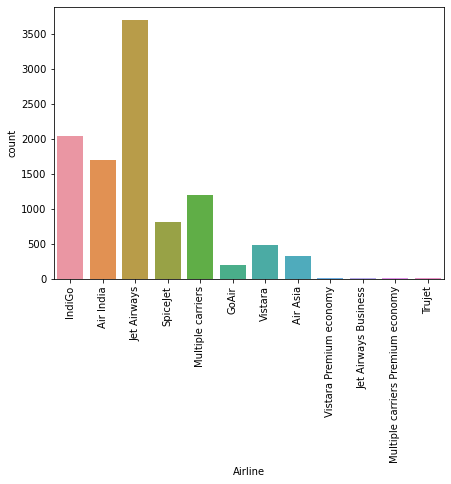

In [284]:
plt.figure(figsize=(7,5))
sns.countplot(x='Airline',data=df)
plt.xticks(rotation=90)
plt.show()

Jet airways flight flew more as compared to others

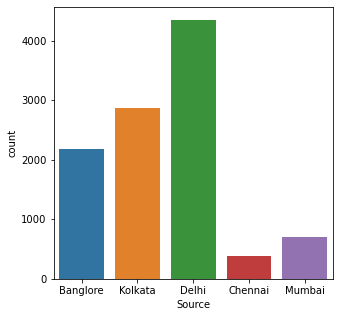

In [285]:
plt.figure(figsize=(5,5))
sns.countplot(x='Source',data=df)
plt.show()

Here we see maximum flight is taken from delhi area than from kolkata and very less from Chennai

<AxesSubplot:xlabel='Destination', ylabel='count'>

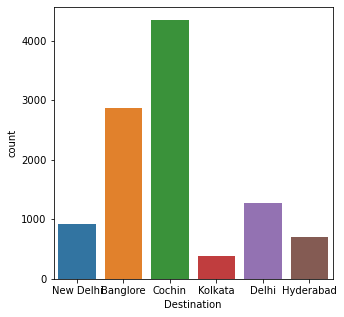

In [286]:
plt.figure(figsize=(5,5))
sns.countplot(x='Destination',data=df)

Maximum flight land on cochin as compared to other

<AxesSubplot:xlabel='Day', ylabel='count'>

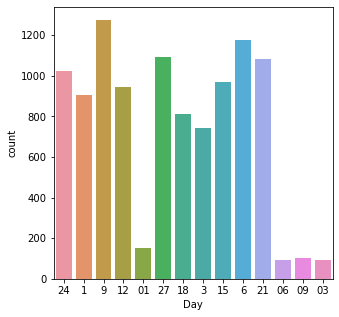

In [287]:
plt.figure(figsize=(5,5))
sns.countplot(x='Day',data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

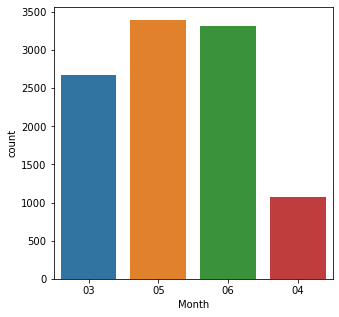

In [288]:
plt.figure(figsize=(5,5))
sns.countplot(x='Month',data=df)

maximum flight flew in the May month as compared to others

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

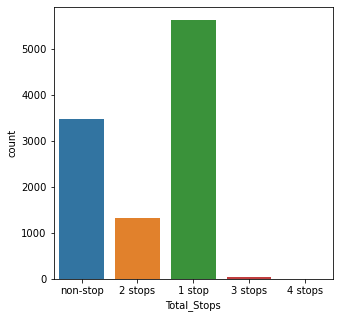

In [289]:
plt.figure(figsize=(5,5))
sns.countplot(x='Total_Stops',data=df)

Maximum count for 1 stop is higher as compared to other

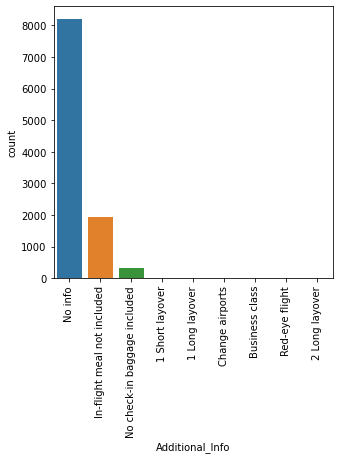

In [290]:
plt.figure(figsize=(5,5))
sns.countplot(x='Additional_Info',data=df)
plt.xticks(rotation=90)
plt.show()

As from above we see additional_ info as maximum count of No info.So we are removing it as it don't help us in prediction.

Also Route and Total_Stops giving us same info so we are deleting one of them

In [291]:
df.drop(['Additional_Info',"Route"],axis=1,inplace=True)

In [292]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,05,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,06,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,05,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,01,03,16,50,21,35,4,45


# Bivariate Analysis

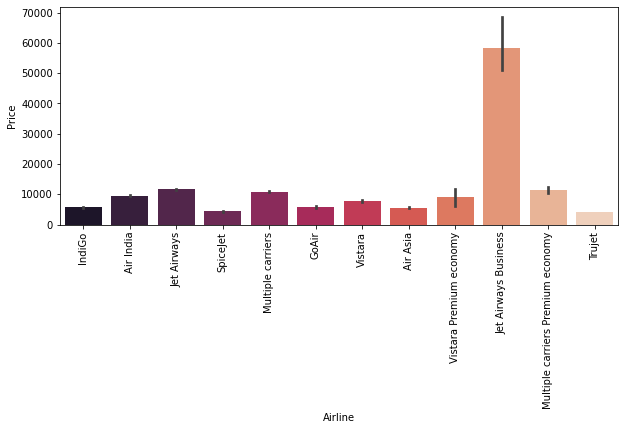

In [293]:
plt.figure(figsize=(10,4))
sns.barplot(df['Airline'],df['Price'],data=df,palette='rocket')
plt.xticks(rotation=90)
plt.show()

Jet airways airline price is high as compared to other

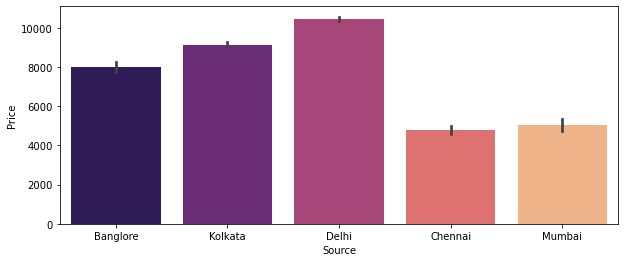

In [294]:
plt.figure(figsize=(10,4))
sns.barplot(df['Source'],df['Price'],data=df,palette='magma')
plt.show()

Maximum flight flew from delhi and price is also hig from delhi source

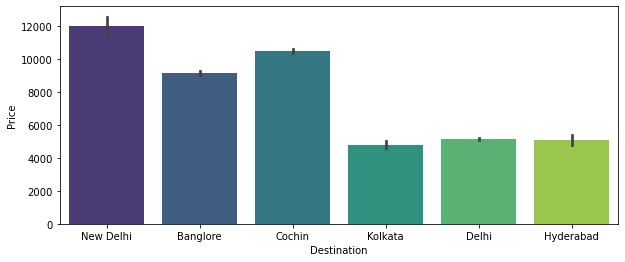

In [295]:
plt.figure(figsize=(10,4))
sns.barplot(df['Destination'],df['Price'],data=df,palette='viridis')
plt.show()

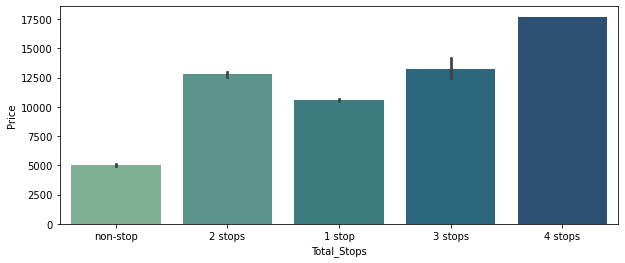

In [296]:
plt.figure(figsize=(10,4))
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette='crest')
plt.show()

As from plot we see price having 4 stops are high as compared to other.

In [297]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [298]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,05,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,06,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,05,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,01,03,16,50,21,35,4,45


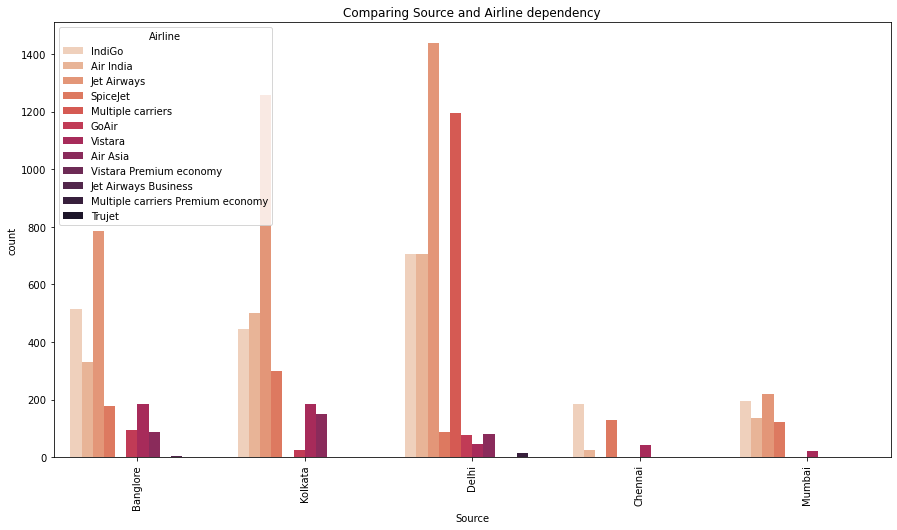

In [299]:
#Comparision between source and airline.
plt.figure(figsize=(15,8))
plt.title('Comparing Source and Airline dependency')
sns.countplot(x='Source',hue='Airline',data=df,palette="rocket_r")
plt.xticks(rotation=90)
plt.show()

From plot we see that maximum flight flew from delhi and taken Jet Airways. after jet airways , Indigo and Air India holds the rank

## MultiVariate Analysis

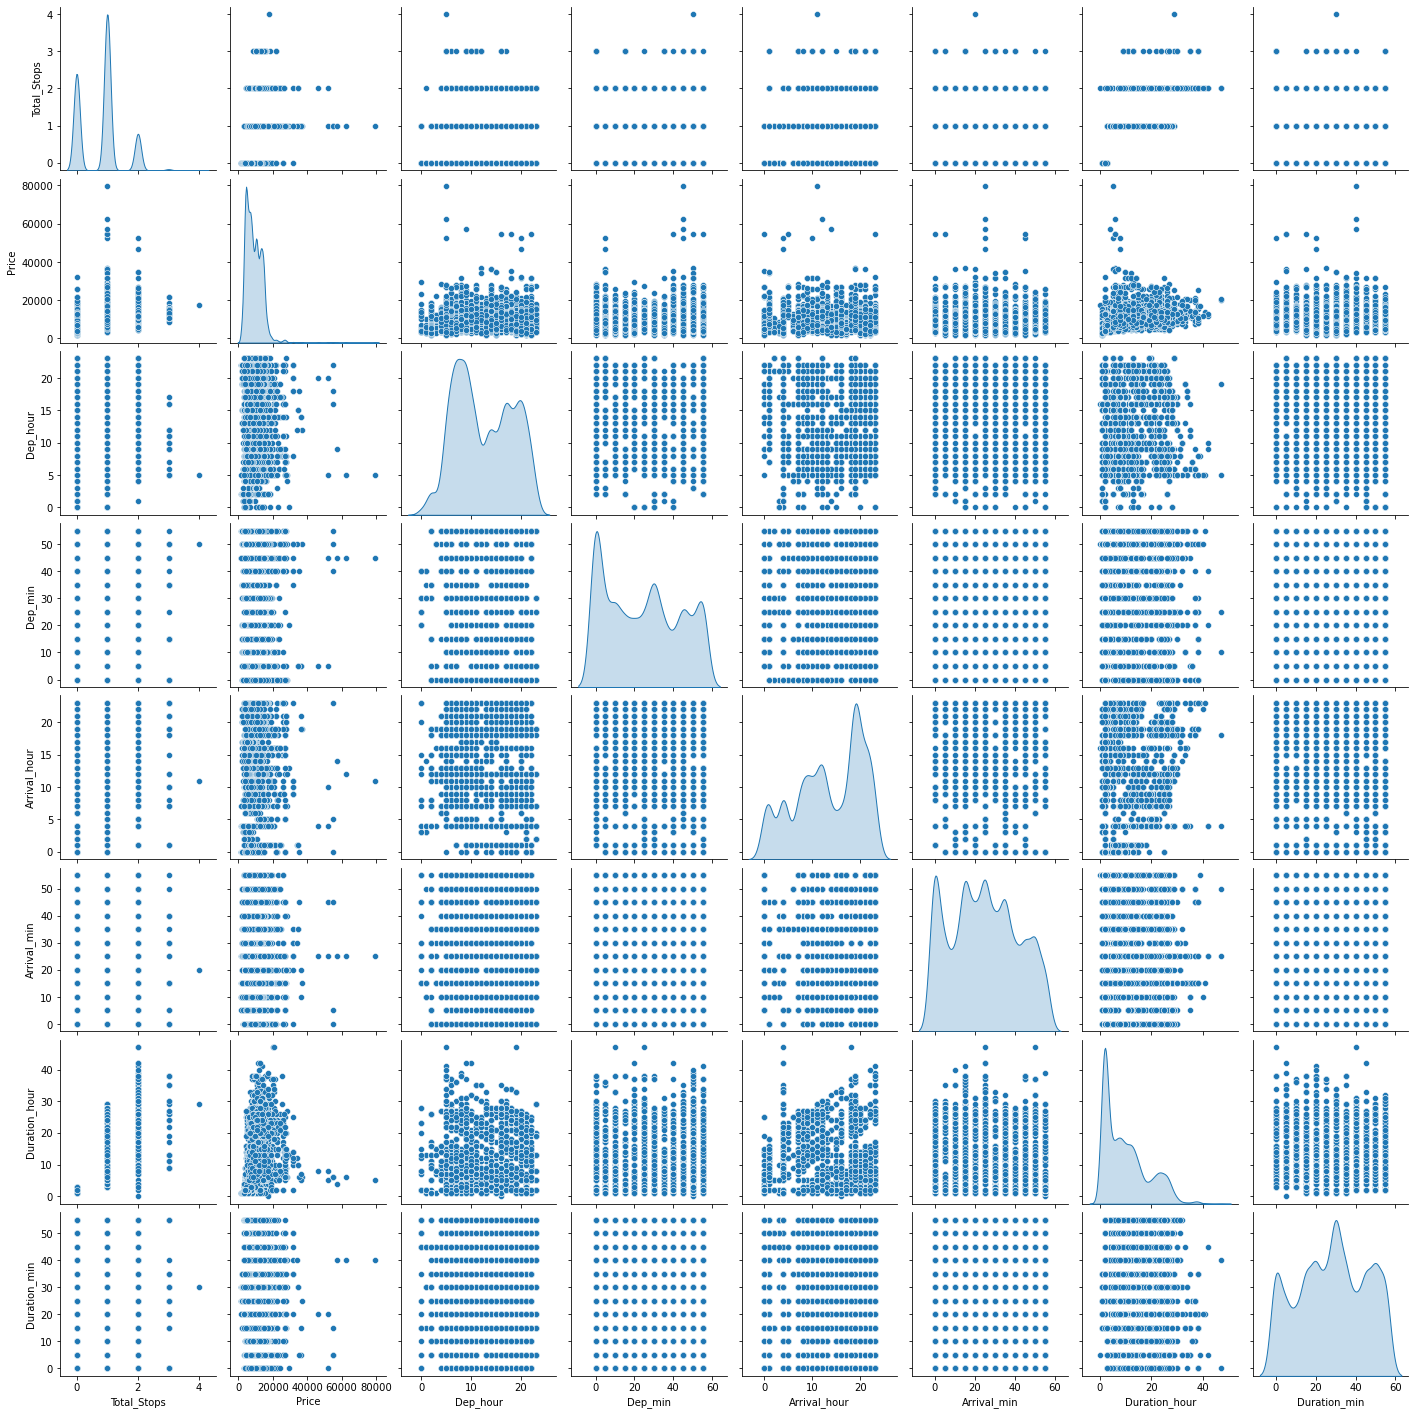

In [300]:
sns.pairplot(df,diag_kind='kde')

## Handling Categorical Data

In [304]:
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [306]:
Source=df[['Source']]
Source=pd.get_dummies(Source)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [307]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [308]:
df_train=pd.concat([df,Airline, Source, Destination],axis=1)

In [309]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,03,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,05,5,50,13,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,06,9,25,4,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,05,18,5,23,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,01,03,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [310]:
df_train.drop(['Airline', 'Source','Destination'],axis=1,inplace=True)

In [311]:
df_train.head()

,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,03,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,05,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,06,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,05,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,01,03,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [312]:
df_train.shape

(10463, 33)

# Test Data Analysis

In [317]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [318]:
#checking test dataset shape
df_test.shape

(2671, 10)

In [319]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [320]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [321]:
#separting day month and year and will remove date of journet column
df_test[['Day','Month','Year']]=df_test['Date_of_Journey'].str.split('/', expand=True)
df_test.drop(columns='Date_of_Journey',axis=1,inplace=True)

In [322]:
df_test=df_test.drop_duplicates()

In [323]:
df_test.shape

(2645, 12)

In [324]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019


In [325]:
#checking the value count of test datsset
for i in df_test.columns:
    print(df_test[i].value_counts())
    print('------------------------')

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
------------------------
Delhi       1127
Kolkata      707
Banglore     550
Mumbai       186
Chennai       75
Name: Source, dtype: int64
------------------------
Cochin       1127
Banglore      707
Delhi         317
New Delhi     233
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
------------------------
DEL → BOM → COK          620
BLR → DEL                386
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
BOM → VGA → TIR → HY

In [326]:
#same as Date of journey we extrat depARTURE TIME  COLUMN
import datetime as dt
# EXTRACTING HOURS
df_test['Dep_hour']=pd.to_datetime(df_test['Dep_Time']).dt.hour

#Extracting minute
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#now we are dropping Dep_Time as we already converted them into other columns as Dep_hour and Dept_min
df_test.drop(['Dep_Time'],axis=1,inplace=True)



In [327]:
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,05,2019,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,05,2019,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019,23,55


In [328]:
#Extracting Arrival Time column in hours and minute
df_test['Arrival_hour']=pd.to_datetime(df_test['Arrival_Time']).dt.hour

df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

df_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [329]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,06,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,05,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,05,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,05,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,06,2019,23,55,2,45


In [330]:
# we are dropping year column as data is of only one year 2019
df_test.drop(['Year'],axis=1,inplace=True)

In [331]:
#Extracting Duration column into hour and min
duration=list(df_test['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h'in duration[i]:
            duration[i]=duration[i].strip()+ ' 0m'
        else:
            duration[i]='0h '+ duration[i]
            
Duration_hour=[]
Duration_min=[]
for i in range(len(duration)):
    Duration_hour.append(int(duration[i].split(sep='h')[0]))
    Duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [332]:
df_test['Duration_hour']=Duration_hour
df_test['Duration_min']=Duration_min
df_test.drop(['Duration'],axis=1,inplace=True)

In [333]:
df_test['Additional_Info']=df_test['Additional_Info'].replace({'No Info':'No info'})

In [334]:
df_test.drop(['Additional_Info',"Route"],axis=1,inplace=True)

In [335]:
df_test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [336]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,06,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,05,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,05,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,05,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,06,23,55,2,45,2,50


In [337]:
Airline=df_test[['Airline']]
Airline=pd.get_dummies(Airline)


Source=df_test[['Source']]
Source=pd.get_dummies(Source)


Destination=df_test[['Destination']]
Destination=pd.get_dummies(Destination)


In [338]:
data_test=pd.concat([df_test,Airline, Source, Destination],axis=1)

In [339]:
data_test.drop(['Airline', 'Source','Destination'],axis=1,inplace=True)

In [340]:
data_test.head()

,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,06,17,30,4,25,10,55,0,...,0,1,0,0,0,1,0,0,0,0
1,1,12,05,6,20,10,20,4,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,21,05,19,15,19,0,23,45,0,...,0,1,0,0,0,1,0,0,0,0
3,1,21,05,8,0,21,0,13,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,24,06,23,55,2,45,2,50,1,...,0,0,0,0,0,0,1,0,0,0


In [341]:
data_test.shape

(2645, 31)

In [372]:
#Correlation matrix
df.corr()

,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
Total_Stops,1.000000,0.601997,-0.067539,-0.002664,0.051457,-0.107098,0.730114,-0.150228
Price,0.601997,1.000000,0.005174,-0.024189,0.031043,-0.086164,0.504090,-0.131683
Dep_hour,-0.067539,0.005174,1.000000,-0.015131,-0.003789,0.072987,-0.000737,-0.018883
Dep_min,-0.002664,-0.024189,-0.015131,1.000000,0.046494,-0.021350,-0.021981,0.089335
Arrival_hour,0.051457,0.031043,-0.003789,0.046494,1.000000,-0.152034,0.065483,-0.116725
Arrival_min,-0.107098,-0.086164,0.072987,-0.021350,-0.152034,1.000000,-0.075930,0.156174
Duration_hour,0.730114,0.504090,-0.000737,-0.021981,0.065483,-0.075930,1.000000,-0.133877
Duration_min,-0.150228,-0.131683,-0.018883,0.089335,-0.116725,0.156174,-0.133877,1.000000


### Heatmap

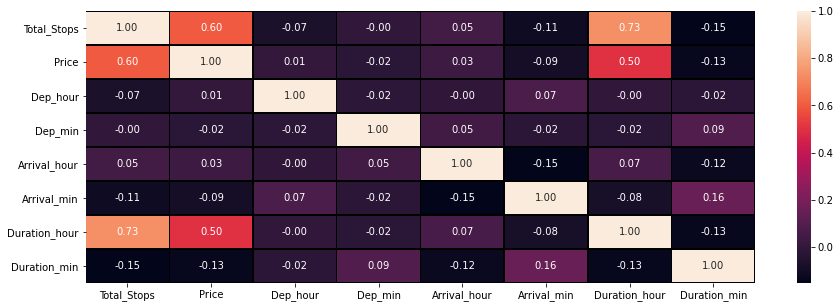

In [374]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True, linewidth=0.5,linecolor='black', fmt='.2f')
plt.show()

In [344]:
df.skew()

Total_Stops      0.332237
Price            1.857641
Day              0.124807
Month           -0.377621
Dep_hour         0.108458
Dep_min          0.171091
Arrival_hour    -0.378815
Arrival_min      0.110803
Duration_hour    0.892296
Duration_min    -0.086036
dtype: float64

In [345]:
df.describe()

,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,0.802351,9026.642454,12.478161,24.406958,13.387269,24.719966,10.027430,28.211316
std,0.660580,4624.653227,5.727055,18.815897,6.855353,16.569658,8.378582,16.878771
min,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8266.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12343.500000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


## Splitting the train and test into x and y

In [346]:
x=df_train.drop('Price',axis=1)
y=df_train['Price']

In [347]:
x.columns

Index(['Total_Stops', 'Day', 'Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hour', 'Duration_min', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [348]:
x.shape

(10463, 32)

In [349]:
y.shape

(10463,)

### Feature Scaling

In [350]:
from sklearn.preprocessing import StandardScaler

In [351]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
X.head()

,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.214674,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,-0.958135,1.290954,-0.177333,...,-0.194397,-0.842899,-0.613325,-0.267152,-0.613325,-0.842899,-0.37085,-0.267152,-0.194397,3.232257
1,1.813113,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,-0.361347,-0.190267,-0.177333,...,-0.194397,-0.842899,1.630457,-0.267152,1.630457,-0.842899,-0.37085,-0.267152,-0.194397,-0.309381
2,1.813113,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,1.070945,-1.671488,-0.177333,...,-0.194397,1.186382,-0.613325,-0.267152,-0.613325,1.186382,-0.37085,-0.267152,-0.194397,-0.309381
3,0.299219,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,-0.600062,-0.190267,-0.177333,...,-0.194397,-0.842899,1.630457,-0.267152,1.630457,-0.842899,-0.37085,-0.267152,-0.194397,-0.309381
4,0.299219,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,-0.719420,0.994710,-0.177333,...,-0.194397,-0.842899,-0.613325,-0.267152,-0.613325,-0.842899,-0.37085,-0.267152,-0.194397,3.232257


In [352]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

## Model Building

In [88]:
max_acc=0
max_RS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    r2=r2_score(y_test,pred)*100
    
    if r2>max_acc:
        max_acc=r2
        max_RS=i
print('Best R2 score is',max_acc, 'on random state', max_RS)

Best R2 score is 84.26740371230093 on random state 85


In [132]:
from sklearn import metrics

In [133]:
# Regression Model Function
def reg(model,x,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=85)
    
    # Training the model
    model.fit(X_train,y_train)
    
    # Predicting Y_test
    pred=model.predict(X_test)
    
     # R2 score
    r2 = r2_score(y_test, pred)*100
    print("R2 Score is:", r2)
    
    print('MAE:',metrics.mean_absolute_error(y_test,pred))
    print('MSE:',metrics.mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [134]:
# Random Forest regressor
model=RandomForestRegressor()
reg(model,X,y)

R2 Score is: 84.00045927975623
MAE: 1162.5017586102647
MSE: 3365919.061875812
RMSE 1834.6441240403578
Cross Validation Score: 80.75585376704868
R2 Score - Cross Validation Score is 3.244605512707551


In [135]:
# Decision tree Regressor
model=DecisionTreeRegressor()
reg(model,X,y)

R2 Score is: 72.56265940930997
MAE: 1367.5729096989965
MSE: 5772157.421027233
RMSE 2402.5314609859397
Cross Validation Score: 71.85085096719371
R2 Score - Cross Validation Score is 0.7118084421162649


In [136]:
model=KNeighborsRegressor()
reg(model,X,y)

R2 Score is: 76.6069131162762
MAE: 1415.5025322503582
MSE: 4921343.583220258
RMSE 2218.410147655356
Cross Validation Score: 75.1971788234597
R2 Score - Cross Validation Score is 1.409734292816509


In [137]:
model=AdaBoostRegressor()
reg(model,X,y)

R2 Score is: 26.05519179452439
MAE: 3375.5836817577856
MSE: 15556211.507411884
RMSE 3944.136344931788
Cross Validation Score: 32.51509479758087
R2 Score - Cross Validation Score is -6.459903003056482


In [138]:
model=GradientBoostingRegressor()
reg(model,X,y)

R2 Score is: 79.07796164562649
MAE: 1490.7761116825504
MSE: 4401494.326720251
RMSE 2097.973862258596
Cross Validation Score: 77.19178355618499
R2 Score - Cross Validation Score is 1.8861780894415006


In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
model=LinearRegression()
reg(model,X,y)

R2 Score is: 62.73355237031184
MAE: 2005.6665486265592
MSE: 7839965.448911513
RMSE 2799.9938301559723
Cross Validation Score: -1.5179590396011242e+27
R2 Score - Cross Validation Score is 1.5179590396011242e+27


In [141]:
# test dataset percentage
metrics.r2_score(y_test,pred)

0.7886674211257583

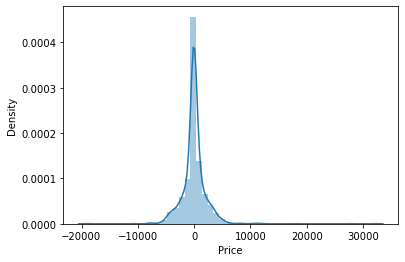

In [142]:
sns.distplot(y_test-pred)
plt.show()

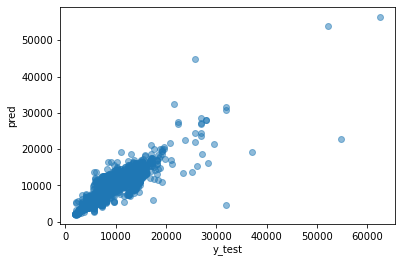

In [143]:
plt.scatter(y_test,pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

## Hyper Parameter Tuning for Best model selected

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
n_estimators=[int(X) for X in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(X) for X in np.linspace(5,30,num=6)]
min_samples_split=[1,2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [146]:
#Creating random grid

param= {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'bootstrap':bootstrap}

In [147]:
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [148]:
rf = RandomForestRegressor()
RSCV = RandomizedSearchCV(estimator = rf, param_distributions=param, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,n_jobs=-1)

In [149]:
RSCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [150]:
RSCV.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [151]:
Final_Model=RandomForestRegressor(n_estimators=1800,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=30,bootstrap=True)
Final_Model.fit(X_train,y_train)
Final_Model.score(X_train,y_train)
pred=Final_Model.predict(X_test)
Final_Model_RF=r2_score(y_test,pred)
print('R2 score:',Final_Model_RF*100)

R2 score: 80.05208500980181


## we sucessfully incorporated our final model with r2 score of 80.05%

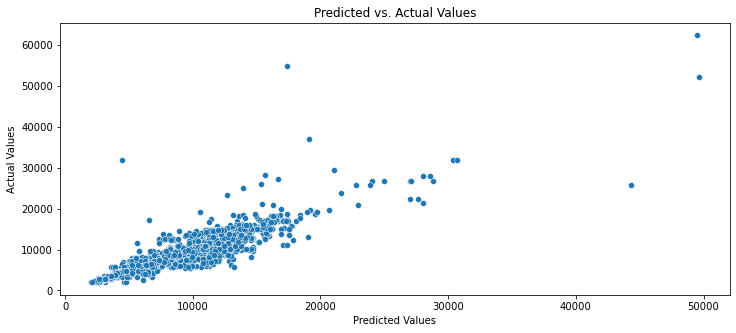

In [380]:
#plot predicted vs. actual values

plt.figure(figsize=[12,5])
sns.scatterplot(x=pred, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

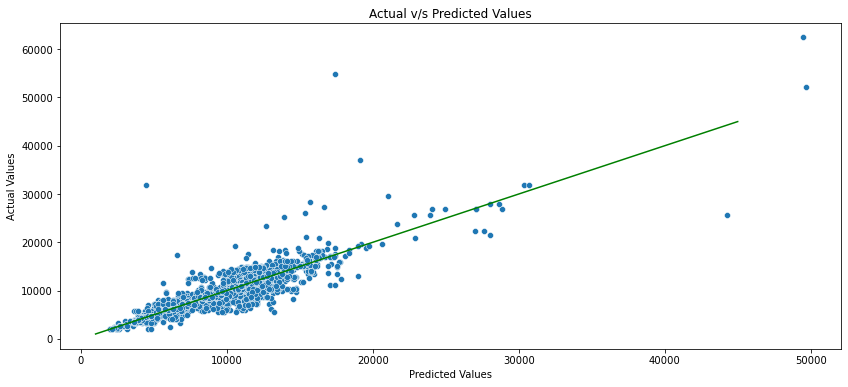

In [381]:
# plot LOO predictions against actual
plt.figure(figsize=[14,6])
plot_LOO = sns.scatterplot(pred,y_test)
plot_LOO.set(xlabel='Predicted Values', ylabel='Actual Values')
# generate and graph y = x line
x_plot= np.linspace(1000,45000)

y_plot=x_plot
plt.plot(x_plot, y_plot, color='g')
plt.title("Actual v/s Predicted Values")
plt.show()

In [356]:
#saving our model for future predictions

import joblib

joblib.dump(Final_Model,'Flight_Price_Prediction.obj')

['Flight_Price_Prediction.obj']

In [357]:
#Loading the  model
import joblib
loaded_model=joblib.load(open('Flight_Price_Prediction.obj','rb')) 

In [362]:
#predicting the test data using the loaded model
Predictions = loaded_model.predict(X_test) 
Predictions

array([ 4738.35360791, 13503.01429149, 10585.55531541, ...,
       11637.6113756 ,  6317.50490641, 10985.56817123])

In [364]:
pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092
Predicted,4738.353608,13503.014291,10585.555315,4239.36078,6354.636896,3857.860228,5484.094205,4298.773248,8933.644823,11056.015949,...,9658.150658,7922.062489,5250.337024,10947.143723,10768.930127,4772.036059,11024.558632,11637.611376,6317.504906,10985.568171
Original,4823.000000,10262.000000,10877.000000,4226.00000,6860.000000,3850.000000,5601.000000,4423.000000,9922.000000,13587.000000,...,5626.000000,9595.000000,6251.000000,10975.000000,10262.000000,4823.000000,10844.000000,8586.000000,6206.000000,10844.000000
